In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import io
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
import glob
import random

from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.time import Time
from astropy import units as u
import scipy.integrate as integrate
import lightkurve

from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

import math
import datetime as dt
import lightkurve.io as l
from lightkurve.io.generic import read_generic_lightcurve

In [2]:
dir_save = 'C:/Users/kmanj/FITS_BD_Files/Data/Esplin_2016/'

In [3]:
Reference = 'Esplin et al 2016 ApJ 832 58'
Telescope = 'Spitzer Space Telescope'
Object = 'WISE J085510.83-071442.5'
SpectralType = 'Y2'
Jmag = '25.45 +/- 0.24'
Hmag = '23.83 +/- 0.24'
Kmag = 'NaN'
RA = 133.7845017
DEC = -7.24425528
Instrument = 'Spitzer/IRAC'
Date_obs_1 = '2015 March 10'
Date_obs_2 = '2015 August 3'
Band_obs_1 = 'Ch1 [3.6 microns]'
Band_obs_2 = 'Ch2 [4.5 microns]'
TSTART_1 = 57090.5488
TSTOP_1 = 57091.4980
TSTART_2 = 57236.9970
TSTOP_2 = 57237.9467

In [4]:
data = pd.read_csv("C:/Users/kmanj/Manjavacas Research/Esplin_2016/3_6_dat.txt", delimiter = ' ', header = None)
data_1 = pd.read_csv("C:/Users/kmanj/Manjavacas Research/Esplin_2016/4_5_dat.txt", delimiter = ' ', header = None)

In [5]:
data1_1 = data_1[data_1[0] < 57100]
data2_1 = data_1[data_1[0] > 57100]

In [6]:
data1 = data[data[0] < 57100]
data2 = data[data[0] > 57100]

data2;

(0.75, 1.2)

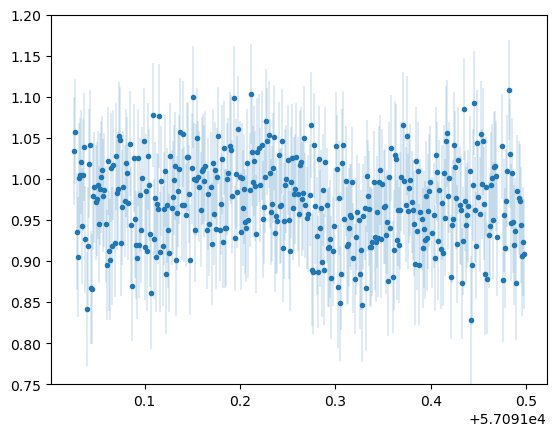

In [7]:
tot = 0 

for i in data1[1]:
    tot += i

total = tot / (len(data1[1]))
total

a = []
for i in data1[1]:
    a.append(i - total)
b1 = []
for i in a:
    b1.append(1 - i)


plt.errorbar(x = data1[0], y = b1, xerr = None, yerr = data1[2], fmt = '.', linewidth = 0.2)
plt.ylim(0.75, 1.2)

(0.75, 1.2)

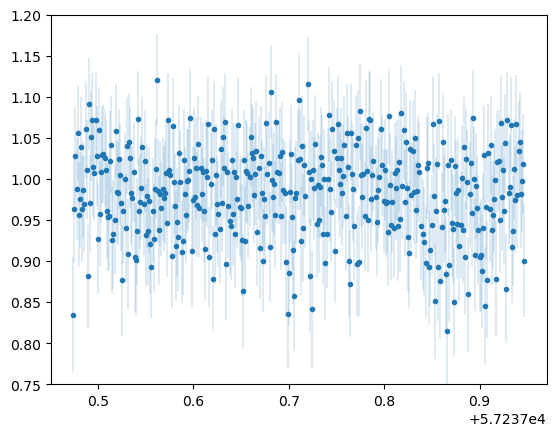

In [8]:
tot = 0 

for i in data2[1]:
    tot += i

total = tot / (len(data2[1]))
total

a = []
for i in data2[1]:
    a.append(i - total)
b2 = []
for i in a:
    b2.append(1 - i)


plt.errorbar(x = data2[0], y = b2, xerr = None, yerr = data2[2], fmt = '.', linewidth = 0.2)
plt.ylim(0.75, 1.2)

In [9]:
tot = 0 

for i in data1_1[1]:
    tot += i

total = tot / (len(data1_1[1]))
total

a = []
for i in data1_1[1]:
    a.append(i - total)
b3= []
for i in a:
    b3.append(1 - i)

(0.75, 1.2)

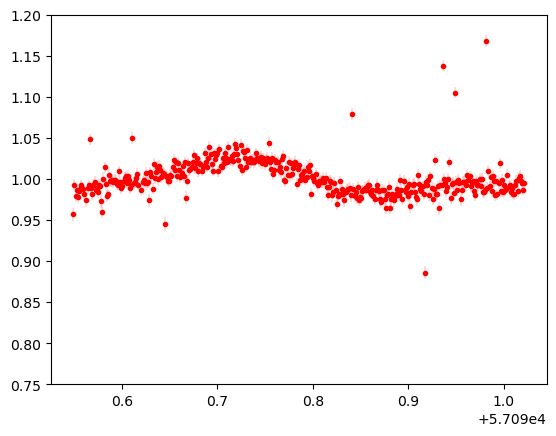

In [10]:
plt.errorbar(x = data1_1[0], y = b3, xerr = None, yerr = data1_1[2], fmt = '.', linewidth = 0.2, c = 'red')
plt.ylim(0.75, 1.2)

In [11]:
tot = 0 

for i in data2_1[1]:
    tot += i

total = tot / (len(data2_1[1]))
total

a = []
for i in data2_1[1]:
    a.append(i - total)
b4 = []
for i in a:
    b4.append(1 - i)

(0.75, 1.2)

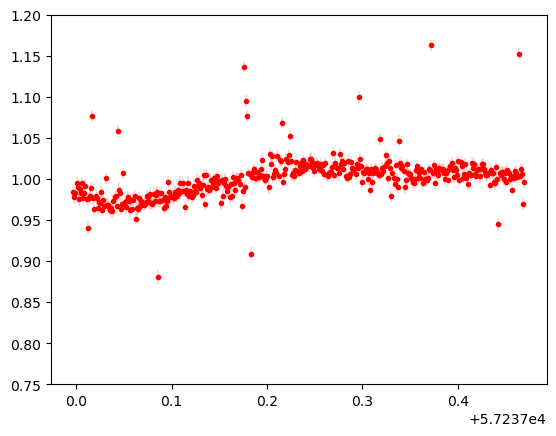

In [12]:
plt.errorbar(x = data2_1[0], y = b4, xerr = None, yerr = data2_1[2], fmt = '.', linewidth = 0.2, c = 'red')
plt.ylim(0.75, 1.2)

<Axes: xlabel='Time [JD]', ylabel='Flux'>

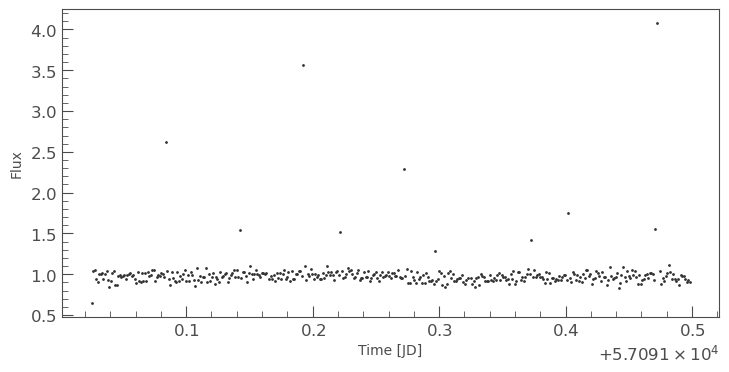

In [35]:
lc = l.LightCurve(time = list(data1[0]) * u.d, flux = list(b1) * u.dimensionless_unscaled, flux_err = list(data1[2])*u.dimensionless_unscaled)
lc.scatter()

In [36]:
lc.to_fits(path = dir_save + 'WISE_J085510.83−071442.5_Ch1_1_Espl2016.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000225498854B0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000022549886140>]

In [37]:
with fits.open(dir_save + 'WISE_J085510.83−071442.5_Ch1_1_Espl2016.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object
    f[0].header['SPECTYPE'] = SpectralType
    f[0].header['DATE_OBS'] = Date_obs_1
    f[0].header['TSTART'] = TSTART_1
    f[0].header['TSTOP'] = TSTOP_1
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_1
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA
    f[0].header['DEC_OBJ'] = DEC
    f[0].header['JMAG'] = Jmag
    f[0].header['HMAG'] = Hmag
    f[0].header['KMAG'] = Kmag
    f[1].header['TUNIT1'] = 'mjd'

<Axes: xlabel='Time [JD]', ylabel='Flux'>

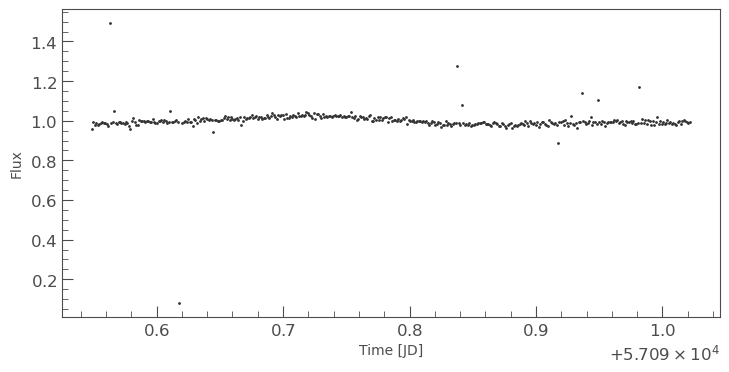

In [38]:
lc = l.LightCurve(time = list(data1_1[0]) * u.d, flux = list(b3) * u.dimensionless_unscaled, flux_err = list(data1_1[2]) * u.dimensionless_unscaled)
lc.scatter()

In [39]:
lc.to_fits(path = dir_save + 'WISE_J085510.83−071442.5_Ch2_1_Espl2016.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000022548127F70>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000022548ED6E90>]

In [40]:
with fits.open(dir_save + 'WISE_J085510.83−071442.5_Ch2_1_Espl2016.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object
    f[0].header['SPECTYPE'] = SpectralType
    f[0].header['DATE_OBS'] = Date_obs_1
    f[0].header['TSTART'] = TSTART_1
    f[0].header['TSTOP'] = TSTOP_1
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_2
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA
    f[0].header['DEC_OBJ'] = DEC
    f[0].header['JMAG'] = Jmag
    f[0].header['HMAG'] = Hmag
    f[0].header['KMAG'] = Kmag
    f[1].header['TUNIT1'] = 'mjd'

In [41]:
lc = l.LightCurve(time = list(data2[0]) * u.d, flux = list(b2) * u.dimensionless_unscaled, flux_err = list(data2[2]) * u.dimensionless_unscaled)
lc;

In [42]:
lc.to_fits(path = dir_save + 'WISE_J085510.83−071442.5_Ch1_2_Espl2016.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000022546597880>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000022548F8C670>]

In [43]:
with fits.open(dir_save + 'WISE_J085510.83−071442.5_Ch1_2_Espl2016.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object
    f[0].header['SPECTYPE'] = SpectralType
    f[0].header['DATE_OBS'] = Date_obs_2
    f[0].header['TSTART'] = TSTART_2
    f[0].header['TSTOP'] = TSTOP_2
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_1
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA
    f[0].header['DEC_OBJ'] = DEC
    f[0].header['JMAG'] = Jmag
    f[0].header['HMAG'] = Hmag
    f[0].header['KMAG'] = Kmag
    f[1].header['TUNIT1'] = 'mjd'

<Axes: xlabel='Time [JD]', ylabel='Flux'>

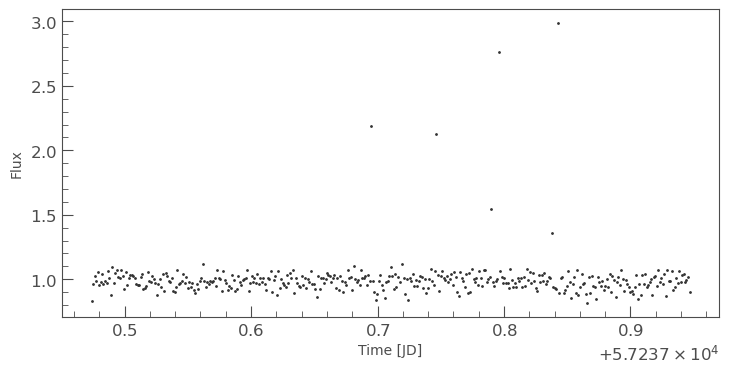

In [44]:
lc.scatter()

In [45]:
lc = l.LightCurve(time = list(data2_1[0]) * u.d, flux = list(b4) * u.dimensionless_unscaled, flux_err = list(data2_1[2]) * u.dimensionless_unscaled)
lc;

In [46]:
lc.to_fits(path = dir_save + 'WISE_J085510.83−071442.5_Ch2_2_Espl2016.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000022549313D90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000022549313DF0>]

In [47]:
with fits.open(dir_save + 'WISE_J085510.83−071442.5_Ch2_2_Espl2016.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object
    f[0].header['SPECTYPE'] = SpectralType
    f[0].header['DATE_OBS'] = Date_obs_2
    f[0].header['TSTART'] = TSTART_2
    f[0].header['TSTOP'] = TSTOP_2
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_2
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA
    f[0].header['DEC_OBJ'] = DEC
    f[0].header['JMAG'] = Jmag
    f[0].header['HMAG'] = Hmag
    f[0].header['KMAG'] = Kmag
    f[1].header['TUNIT1'] = 'mjd'

In [48]:
lc1 = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Esplin_2016/WISE_J085510.83−071442.5_Ch2_2_Espl2016.fits", time_format = 'mjd')
lc2 = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Esplin_2016/WISE_J085510.83−071442.5_Ch1_2_Espl2016.fits", time_format = 'mjd')
lc3 = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Esplin_2016/WISE_J085510.83−071442.5_Ch1_1_Espl2016.fits", time_format = 'mjd')
lc4 = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Esplin_2016/WISE_J085510.83−071442.5_Ch2_1_Espl2016.fits", time_format = 'mjd')

<Axes: xlabel='Time', ylabel='Flux'>

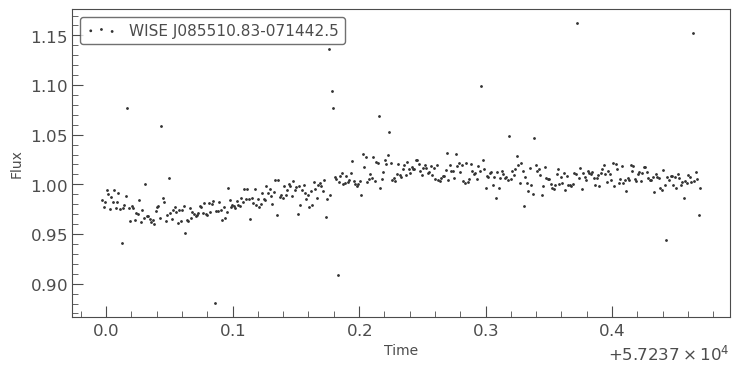

In [49]:
lc1.scatter()

<Axes: xlabel='Time', ylabel='Flux'>

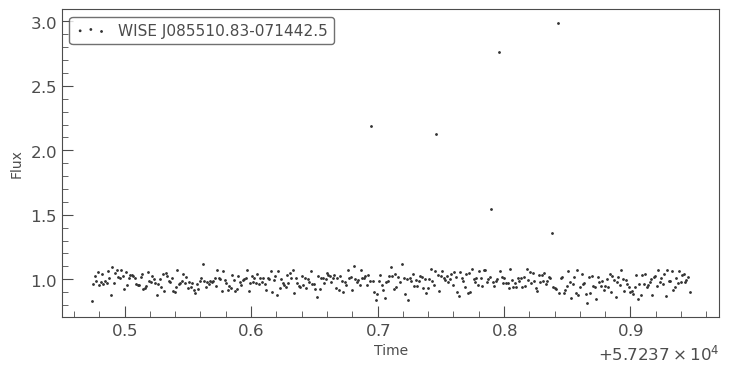

In [50]:
lc2.scatter()

<Axes: xlabel='Time', ylabel='Flux'>

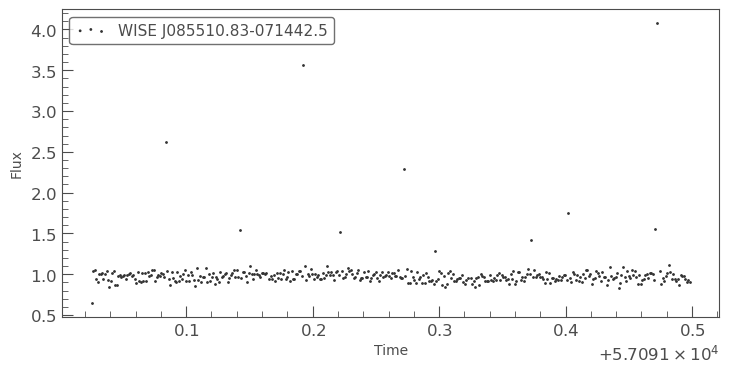

In [51]:
lc3.scatter()

<Axes: xlabel='Time', ylabel='Flux'>

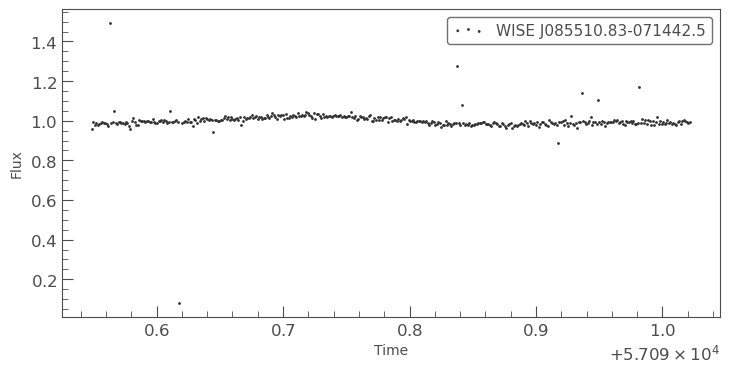

In [52]:
lc4.scatter()